In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, mean_squared_error


In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv')

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [10]:
data = df[['price','sqft_living','waterfront','view','grade','condition','yr_renovated','yr_built']]

In [11]:
data = pd.get_dummies(data, columns=['view','grade','condition'], dtype=int)

In [12]:
data.head()

,price,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,0,0,1955,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,0,1991,1951,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,770,0,0,1933,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,0,0,1965,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,0,0,1987,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
Y = data['price']
X = data.drop('price', axis=1)

In [14]:
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1932.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        18:42:07   Log-Likelihood:            -2.9553e+05
No. Observations:               21613   AIC:                         5.911e+05
Df Residuals:                   21589   BIC:                         5.913e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    141.0359      2.499     56.441   

In [15]:
pred = model.predict(X)

In [16]:
residuals = pred - Y

In [17]:
residuals

0        114872.335008
1         61954.017115
2         67564.435227
3       -120881.448643
4        -78944.166015
             ...      
21608     -7756.650809
21609     49147.447685
21610   -229416.385610
21611    -24780.252251
21612   -149694.608203
Length: 21613, dtype: float64

Text(0, 0.5, 'residuals / errors')

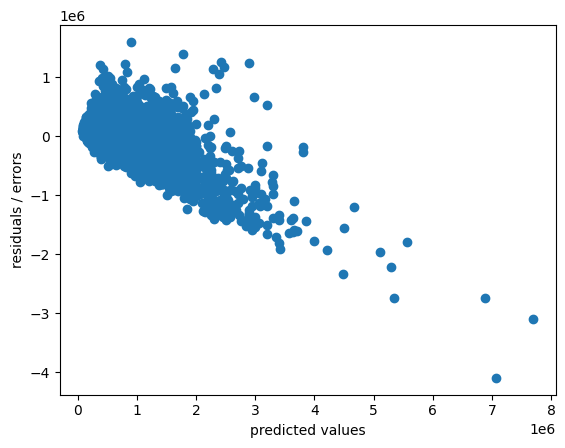

In [19]:
plt.scatter(Y, residuals)
plt.xlabel('predicted values')
plt.ylabel('residuals / errors')

In [20]:
influence = model.get_influence()

In [21]:
influence

In [22]:
cooks_d = influence.cooks_distance[0]

In [23]:
cooks_d

array([2.40374033e-06, 4.33437786e-06, 2.41558128e-06, ...,
       1.52383334e-05, 1.36806957e-07, 6.35659735e-06])

In [24]:
threshold = 4 / (len(data) - X.shape[1] - 1)

In [25]:
threshold

0.0001853052904660428

In [26]:
high_influence_points = np.where(cooks_d > threshold)[0]

In [27]:
high_influence_points

array([    5,    21,    36, ..., 21568, 21576, 21597])

In [31]:
hid = data.loc[high_influence_points]

In [33]:
hid.describe()

,price,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
count,1.187000e+03,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000
mean,1.341606e+06,3554.608256,0.113732,289.249368,1970.920809,0.443134,0.090986,0.139006,0.147430,0.179444,...,0.191238,0.232519,0.216512,0.069924,0.010952,0.015164,0.031171,0.639427,0.218197,0.096040
std,8.649311e+05,1478.284315,0.317619,702.964039,31.915896,0.496965,0.287710,0.346098,0.354684,0.383885,...,0.393442,0.422616,0.412041,0.255127,0.104121,0.122258,0.173853,0.480369,0.413196,0.294771
min,7.500000e+04,290.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.802500e+05,2660.000000,0.000000,0.000000,1949.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.225000e+06,3520.000000,0.000000,0.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.757500e+06,4360.000000,0.000000,0.000000,1999.500000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,7.700000e+06,13540.000000,1.000000,2015.000000,2015.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
new_data = data.drop(data.index[high_influence_points])

In [39]:
new_data

,price,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
0,221900.0,1180,0,0,1955,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,538000.0,2570,0,1991,1951,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,180000.0,770,0,0,1933,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,604000.0,1960,0,0,1965,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,510000.0,1680,0,0,1987,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,0,0,2009,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21609,400000.0,2310,0,0,2014,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21610,402101.0,1020,0,0,2009,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21611,400000.0,1600,0,0,2004,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [40]:
Y = new_data['price']
X = new_data.drop('price', axis=1)

In [41]:
model2 = sm.OLS(Y,X).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.663
Method:                 Least Squares   F-statistic:                     2010.
Date:                Wed, 27 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:14:36   Log-Likelihood:            -2.7127e+05
No. Observations:               20426   AIC:                         5.426e+05
Df Residuals:                   20405   BIC:                         5.428e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
sqft_living    105.9211      1.832     57.820   

In [42]:
pred2 = model2.predict(X)

In [43]:
res2 = pred2-Y

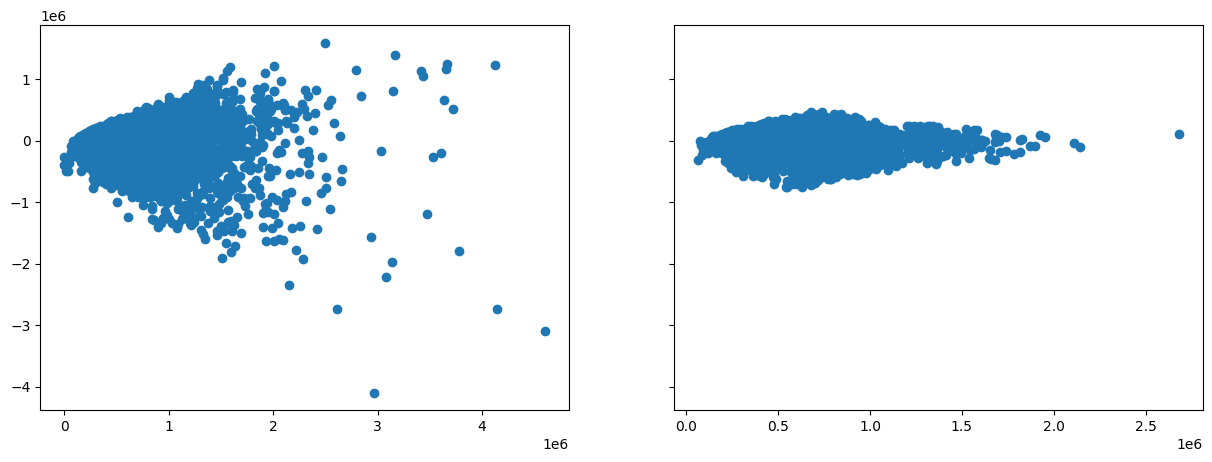

In [45]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharey=True)
ax1.scatter(pred, residuals)
ax2.scatter(pred2, res2)

In [46]:
# building the same model in sklearn
Y = new_data['price']
X = new_data.drop('price', axis=1)


In [47]:
# step 1: split your data in a TRAINING set and TESTING set

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [49]:
X_train

,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,grade_1,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
14176,2300,0,0,2004,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3332,700,0,0,1958,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
19720,2329,0,0,2010,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21005,2370,0,0,2014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6874,3210,0,0,1998,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12962,1350,0,0,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17176,1870,0,0,1959,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1976,2130,0,0,1963,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9764,1200,0,0,1986,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [50]:
y_train

14176    675000.0
3332     250000.0
19720    327555.0
21005    388598.0
6874     915000.0
           ...   
12962    388500.0
17176    325000.0
1976     830000.0
9764     219000.0
3265     218000.0
Name: price, Length: 14298, dtype: float64

In [51]:
X_test

,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,grade_1,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
2052,1720,0,0,1969,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12621,1310,0,0,1957,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
12000,3950,0,0,2001,1,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3198,1030,0,0,1967,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16410,2640,0,0,1998,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4425,1870,0,0,1959,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
17639,1930,0,0,1969,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6665,1070,0,0,1908,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
12439,2540,0,0,1997,1,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [52]:
y_test

2052     380000.0
12621    405000.0
12000    771150.0
3198     210000.0
16410    570000.0
           ...   
4425     285000.0
17639    390000.0
6665     455000.0
12439    630000.0
231      500000.0
Name: price, Length: 6128, dtype: float64

In [53]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([ 1.03620555e+02,  4.85787345e+05,  1.57577193e+01, -2.37745383e+03,
       -1.12514865e+05, -1.32569223e+04, -5.68124638e+04, -2.54502173e+03,
        1.85129273e+05,  2.26864358e-08, -2.67173164e-08, -3.67113015e+05,
       -4.34242569e+05, -3.68905160e+05, -2.66831957e+05, -1.49704162e+05,
       -2.46363788e+03,  1.31893460e+05,  4.74998862e+05,  9.82368179e+05,
        0.00000000e+00, -2.46060662e+04, -4.51371126e+04,  5.67260492e+03,
        8.68701095e+03,  5.53835629e+04])

In [56]:
X_train.columns

Index(['sqft_living', 'waterfront', 'yr_renovated', 'yr_built', 'view_0',
       'view_1', 'view_2', 'view_3', 'view_4', 'grade_1', 'grade_3', 'grade_4',
       'grade_5', 'grade_6', 'grade_7', 'grade_8', 'grade_9', 'grade_10',
       'grade_11', 'grade_12', 'grade_13', 'condition_1', 'condition_2',
       'condition_3', 'condition_4', 'condition_5'],
      dtype='object')

In [62]:
# use the coefficients to assess feature importance

pd.DataFrame([X_train.columns,model.coef_]).T.sort_values(1, ascending=False)

,0,1
19,grade_12,982368.178826
1,waterfront,485787.344995
18,grade_11,474998.862391
8,view_4,185129.273201
17,grade_10,131893.460049
25,condition_5,55383.562905
24,condition_4,8687.010952
23,condition_3,5672.604915
0,sqft_living,103.620555
2,yr_renovated,15.757719


In [63]:
pred = model.predict(X_test)

In [64]:
pred

array([502373.42909887, 368276.24718851, 935951.95947504, ...,
       360843.75428878, 664999.69498209, 511366.78157964])

In [66]:
y_test

2052     380000.0
12621    405000.0
12000    771150.0
3198     210000.0
16410    570000.0
           ...   
4425     285000.0
17639    390000.0
6665     455000.0
12439    630000.0
231      500000.0
Name: price, Length: 6128, dtype: float64

In [67]:
np.sqrt(mean_squared_error(pred, y_test))

142894.85069182786

In [70]:
abs(res2).mean()

109546.40331036989

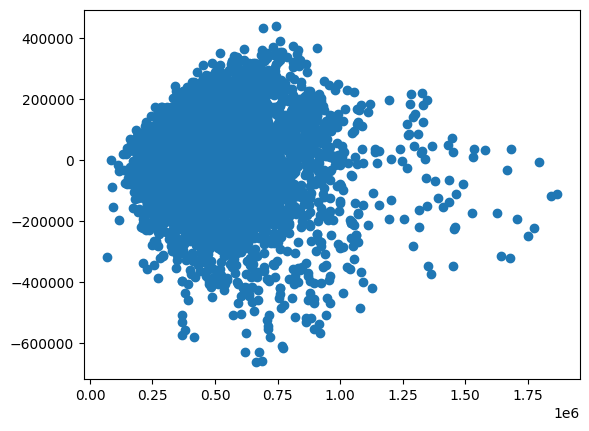

In [72]:
plt.scatter(pred,pred-y_test)

In [73]:
# non-linear regression model - decision tree regressor
Y = data['price']
X = data.drop('price', axis=1)


In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2)

In [78]:
model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

DecisionTreeRegressor()

In [79]:
pred3 = model2.predict(X_test)

In [80]:
np.sqrt(mean_squared_error(pred3, y_test))

274120.8806069768

In [83]:
abs(residuals).mean()

137875.99024630236

In [84]:
pred_train = model2.predict(X_train)

In [85]:
np.sqrt(mean_squared_error(pred_train, y_train))

39613.87713307545

In [89]:
model3 = DecisionTreeRegressor(max_depth=5)
model3.fit(X_train, y_train)
pred4 = model3.predict(X_test)
print(np.sqrt(mean_squared_error(pred4, y_test)))
pred4_train = model3.predict(X_train)
print(np.sqrt(mean_squared_error(pred4_train, y_train)))

230241.29073531952
218505.4177333559


In [91]:
data.price.median()

450000.0

In [93]:
def price_category(x):
    if x < 250000:
        return 1
    elif x >= 250000 and x < 450000:
        return 2
    elif x >= 450000 and x < 750000:
        return 3
    else:
        return 4

In [94]:
data['price_target'] = data['price'].apply(price_category)

In [95]:
Y = data['price_target']
X = data.drop(['price','price_target'], axis=1)

In [96]:
data.groupby('price_target').count()

,price,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
price_target,,,,,,,,,,,,,,,,,,,,,
1,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,...,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303
2,8389,8389,8389,8389,8389,8389,8389,8389,8389,8389,...,8389,8389,8389,8389,8389,8389,8389,8389,8389,8389
3,7253,7253,7253,7253,7253,7253,7253,7253,7253,7253,...,7253,7253,7253,7253,7253,7253,7253,7253,7253,7253
4,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668,...,3668,3668,3668,3668,3668,3668,3668,3668,3668,3668


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3)

In [99]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.5186613201727329
0.9589530041641879


In [100]:
clf_pred

array([3, 3, 2, ..., 3, 2, 3])

In [101]:
y_test

4711     3
1560     3
12036    2
4366     3
14126    2
        ..
18584    2
16366    2
20081    3
8911     1
6124     2
Name: price_target, Length: 6484, dtype: int64

In [102]:
X_test

,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,grade_1,...,grade_9,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5
4711,1590,0,0,1926,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1560,2130,0,0,1919,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12036,1904,0,0,1999,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4366,1750,0,0,1977,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
14126,2210,0,2000,1914,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18584,1430,0,0,1947,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
16366,1120,0,0,1946,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
20081,1650,0,0,2014,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8911,1110,0,0,2007,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [103]:
clf = DecisionTreeClassifier(max_depth=15)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.567550894509562
0.7547755965364532


In [104]:
clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.595311536088834
0.6574129155925705


In [105]:
clf = DecisionTreeClassifier(max_depth=5)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.5920727945712523
0.5941569171789279


In [106]:
from sklearn.metrics import confusion_matrix

In [107]:
confusion_matrix(y_test, clf_pred)

array([[  95,  527,   58,    0],
       [  50, 1680,  785,   30],
       [   5,  544, 1345,  276],
       [   1,   45,  324,  719]])

In [108]:
clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.5225169648365207
0.6129949104369092


In [109]:
clf = KNeighborsClassifier(n_neighbors=100)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.5485811227637261
0.5618348866415493


In [110]:
clf = KNeighborsClassifier(n_neighbors=1000)
clf.fit(X_train, y_train)
clf_pred = clf.predict(X_test)
print(accuracy_score(clf_pred, y_test))
clf_pred_train = clf.predict(X_train)
print(accuracy_score(clf_pred_train, y_train))

0.5279148673658236
0.5285213827748033


In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
data

,price,sqft_living,waterfront,yr_renovated,yr_built,view_0,view_1,view_2,view_3,view_4,...,grade_10,grade_11,grade_12,grade_13,condition_1,condition_2,condition_3,condition_4,condition_5,price_target
0,221900.0,1180,0,0,1955,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,538000.0,2570,0,1991,1951,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,180000.0,770,0,0,1933,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,604000.0,1960,0,0,1965,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,510000.0,1680,0,0,1987,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,1530,0,0,2009,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
21609,400000.0,2310,0,0,2014,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
21610,402101.0,1020,0,0,2009,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2
21611,400000.0,1600,0,0,2004,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2


<Axes: xlabel='sqft_living', ylabel='yr_built'>

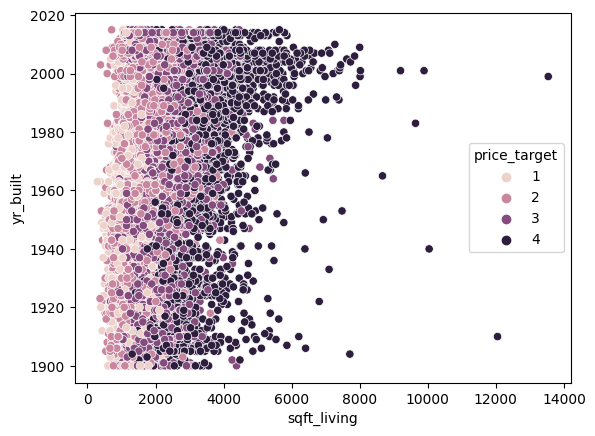

In [116]:
sns.scatterplot(x='sqft_living',y='yr_built',  data=data ,hue='price_target')